## Stock predictive model

In [14]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [15]:
#Load s&p500 dataset
data = pd.read_csv('SPY.csv')

In [16]:
# display data
data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


<Axes: >

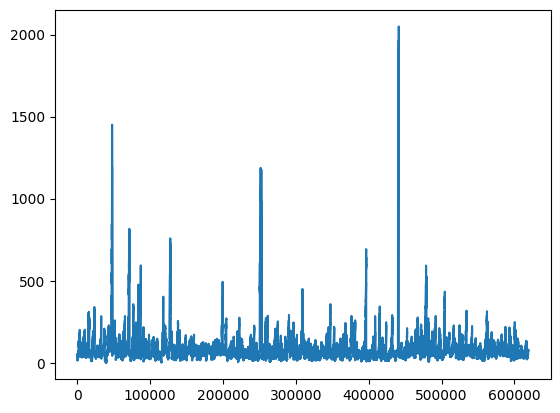

In [17]:
data['close'].plot()

In [18]:
#split between train and data
train = data.iloc[:int(.80*len(data)), :]

#split between train and data
test = data.iloc[int(.80*len(data)):, :]

In [20]:
# Define the features and target
features = ['open', 'volume']
target = ['close']

In [21]:
#train the model
model = xgb.XGBRegressor()
model.fit(train[features], train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
#make predictions
prediction = model.predict(test[features])
print('Model predictions:')
print(prediction)

Model predictions:
[52.07648  52.37065  52.085934 ... 76.72886  72.57493  72.57493 ]


In [23]:
#compare with the correct values
print('Actual values:')
print(test[target])

Actual values:
        close
495232  52.30
495233  52.09
495234  52.56
495235  52.61
495236  52.27
...       ...
619035  77.82
619036  76.78
619037  73.83
619038  73.27
619039  73.86

[123808 rows x 1 columns]


In [24]:
# accuracy
acc = model.score(test[features], test[target])
print('Accuracy:')
print(acc)

Accuracy:
0.9986386299133301


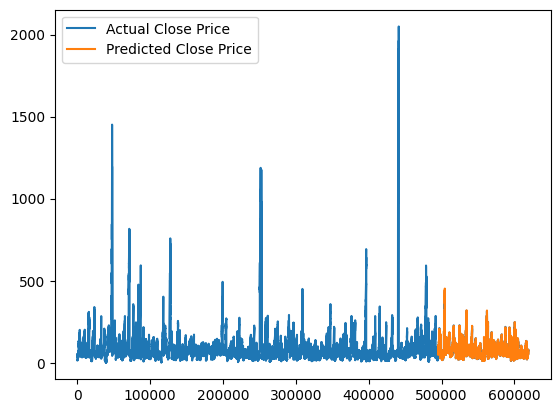

In [25]:
# plot predictions and actual close price
plt.plot(data['close'], label = 'Actual Close Price')
plt.plot(test[target].index, prediction, label = 'Predicted Close Price')
plt.legend()
plt.show()
